In [1]:
import pyforest

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn import metrics

### Visulization Customization

In [2]:
sns.set(rc={'figure.figsize':(18, 6)})
sns.set_style('whitegrid')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Reading The Data

In [3]:
df_fullfilment = pd.read_csv('fulfilment_center_info.csv')
df_meal = pd.read_csv('meal_info.csv')
df_train = pd.read_csv('train.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [4]:
df_fullfilment.head(2)

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7


In [5]:
df_meal.head(2)

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai


In [6]:
df_test = pd.read_csv('test_QoiMO9B.csv')

<IPython.core.display.Javascript object>

In [7]:
df_test.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
0,1028232,146,55,1885,158.11,159.11,0,0
1,1127204,146,55,1993,160.11,159.11,0,0
2,1212707,146,55,2539,157.14,159.14,0,0
3,1082698,146,55,2631,162.02,162.02,0,0
4,1400926,146,55,1248,163.93,163.93,0,0


### Checking for Data Dimension 

In [8]:
df_train.head(2)

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270


In [9]:
df_fullfilment.shape

(77, 5)

In [10]:
df_meal.shape

(51, 3)

In [11]:
df_train.shape

(456548, 9)

### Merging Data

In [12]:
data=pd.merge(df_train, df_fullfilment ,on='center_id')

<IPython.core.display.Javascript object>

In [13]:
data_test=pd.merge(df_test, df_fullfilment ,on='center_id')

<IPython.core.display.Javascript object>

In [14]:
data

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0
1,1466964,1,55,1993,136.83,135.83,0,0,270,647,56,TYPE_C,2.0
2,1346989,1,55,2539,134.86,135.86,0,0,189,647,56,TYPE_C,2.0
3,1338232,1,55,2139,339.50,437.53,0,0,54,647,56,TYPE_C,2.0
4,1448490,1,55,2631,243.50,242.50,0,0,40,647,56,TYPE_C,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
456543,1271326,145,61,1543,484.09,484.09,0,0,68,473,77,TYPE_A,4.5
456544,1062036,145,61,2304,482.09,482.09,0,0,42,473,77,TYPE_A,4.5
456545,1110849,145,61,2664,237.68,321.07,0,0,501,473,77,TYPE_A,4.5
456546,1147725,145,61,2569,243.50,313.34,0,0,729,473,77,TYPE_A,4.5


In [15]:
data.shape

(456548, 13)

In [16]:
df = pd.merge(data, df_meal, on='meal_id')

<IPython.core.display.Javascript object>

In [17]:
df_test = pd.merge(data_test, df_meal, on='meal_id')

<IPython.core.display.Javascript object>

### Data 

In [18]:
df.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai
1,1018704,2,55,1885,135.83,152.29,0,0,323,647,56,TYPE_C,2.0,Beverages,Thai
2,1196273,3,55,1885,132.92,133.92,0,0,96,647,56,TYPE_C,2.0,Beverages,Thai
3,1116527,4,55,1885,135.86,134.86,0,0,163,647,56,TYPE_C,2.0,Beverages,Thai
4,1343872,5,55,1885,146.50,147.50,0,0,215,647,56,TYPE_C,2.0,Beverages,Thai


In [19]:
df_test.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,city_code,region_code,center_type,op_area,category,cuisine
0,1028232,146,55,1885,158.11,159.11,0,0,647,56,TYPE_C,2.0,Beverages,Thai
1,1262649,147,55,1885,159.11,159.11,0,0,647,56,TYPE_C,2.0,Beverages,Thai
2,1453211,149,55,1885,157.14,158.14,0,0,647,56,TYPE_C,2.0,Beverages,Thai
3,1262599,150,55,1885,159.14,157.14,0,0,647,56,TYPE_C,2.0,Beverages,Thai
4,1495848,151,55,1885,160.11,159.11,0,0,647,56,TYPE_C,2.0,Beverages,Thai


In [20]:
df.shape

(456548, 15)

In [21]:
df_test.shape

(32573, 14)

**Now, Our train and test dataset is ready**

## Exploratory Data Analysis

In [22]:
df.keys()

Index(['id', 'week', 'center_id', 'meal_id', 'checkout_price', 'base_price',
       'emailer_for_promotion', 'homepage_featured', 'num_orders', 'city_code',
       'region_code', 'center_type', 'op_area', 'category', 'cuisine'],
      dtype='object')

In [23]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,456548.0,1.250096e+06,144354.822378,1000000.00,1124998.75,1250183.50,1375140.25,1499999.00
week,456548.0,7.476877e+01,41.524956,1.00,39.00,76.00,111.00,145.00
center_id,456548.0,8.210580e+01,45.975046,10.00,43.00,76.00,110.00,186.00
meal_id,456548.0,2.024337e+03,547.420920,1062.00,1558.00,1993.00,2539.00,2956.00
checkout_price,456548.0,3.322389e+02,152.939723,2.97,228.95,296.82,445.23,866.27
base_price,456548.0,3.541566e+02,160.715914,55.35,243.50,310.46,458.87,866.27
emailer_for_promotion,456548.0,8.115247e-02,0.273069,0.00,0.00,0.00,0.00,1.00
homepage_featured,456548.0,1.091999e-01,0.311890,0.00,0.00,0.00,0.00,1.00
num_orders,456548.0,2.618728e+02,395.922798,13.00,54.00,136.00,324.00,24299.00
city_code,456548.0,6.015534e+02,66.195914,456.00,553.00,596.00,651.00,713.00


<IPython.core.display.Javascript object>

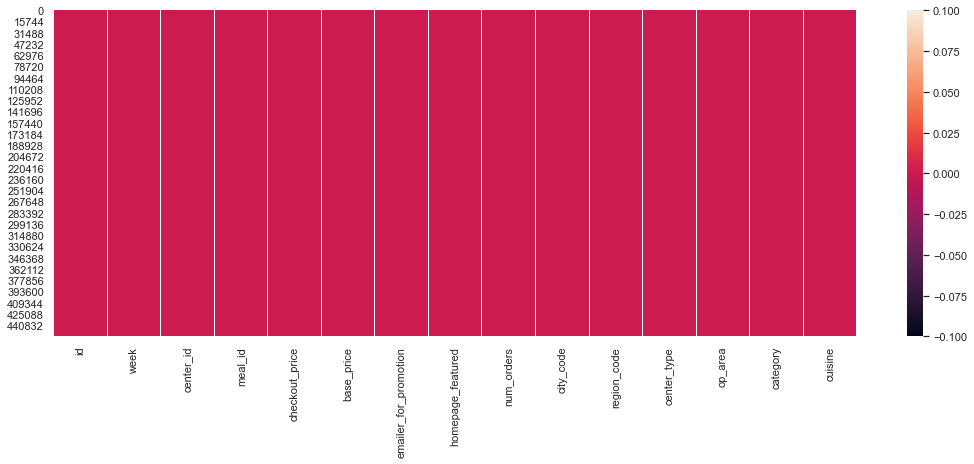

In [24]:
sns.heatmap(df.isnull())

<IPython.core.display.Javascript object>

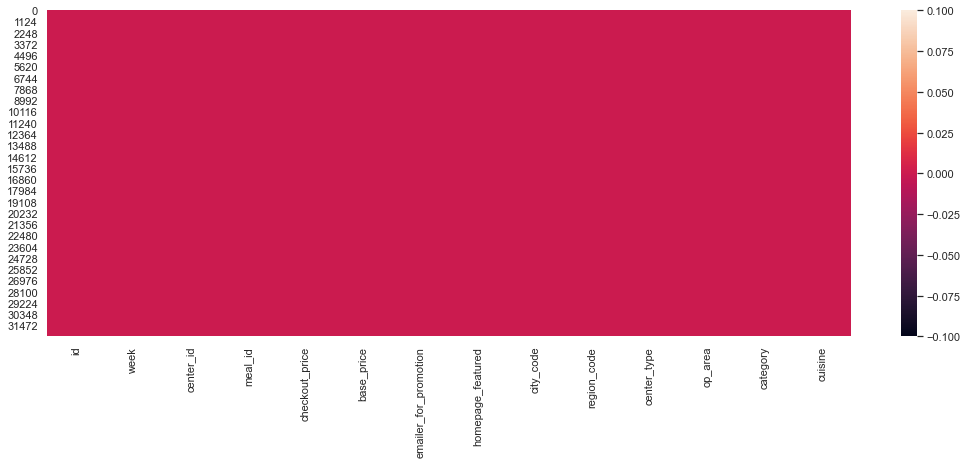

In [25]:
sns.heatmap(df_test.isnull())

**Our data is clean there is no nan or missing value present so we can go for further analysis**

### Univariate Analysis

<IPython.core.display.Javascript object>

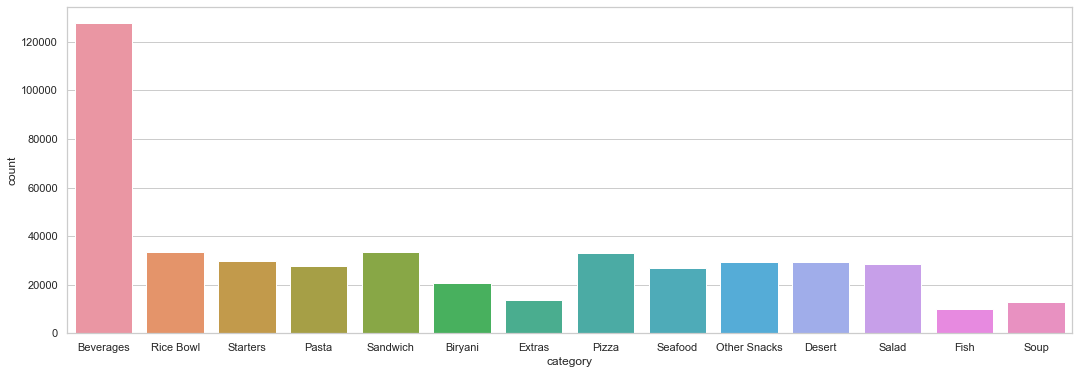

In [26]:
sns.countplot(df['category'])

so, from category column we got to know that the most of the user are like to order **Beverages** and least ordered item is **Fish**

<IPython.core.display.Javascript object>

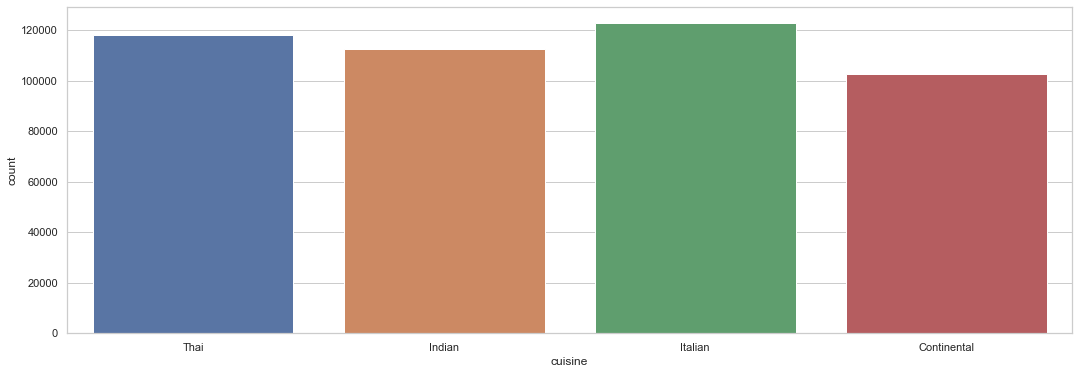

In [27]:
sns.countplot(df['cuisine'])

we can easily say that most number of people like **Italian food**, Thai food

<IPython.core.display.Javascript object>

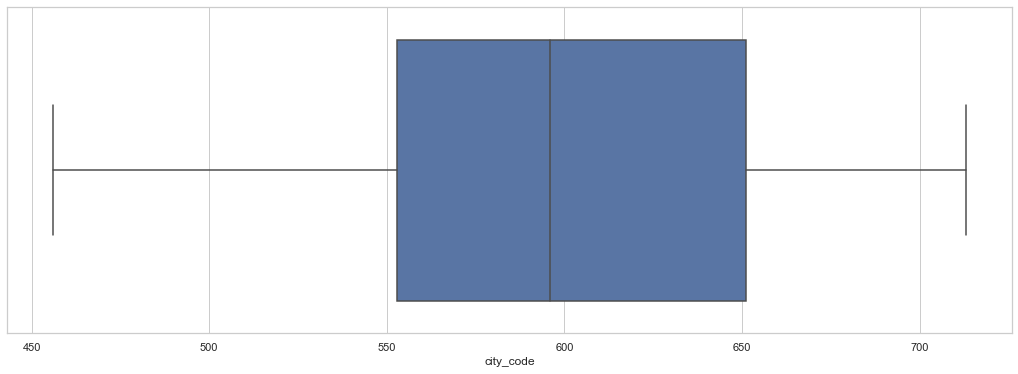

In [28]:
sns.boxplot(df['city_code'])

<IPython.core.display.Javascript object>

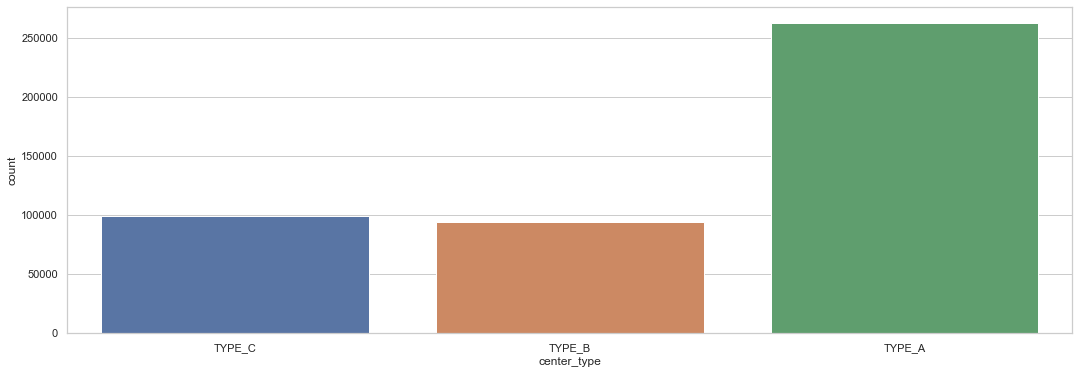

In [29]:
sns.countplot(df['center_type'])

most of the order are coming from **Type_A**

<IPython.core.display.Javascript object>

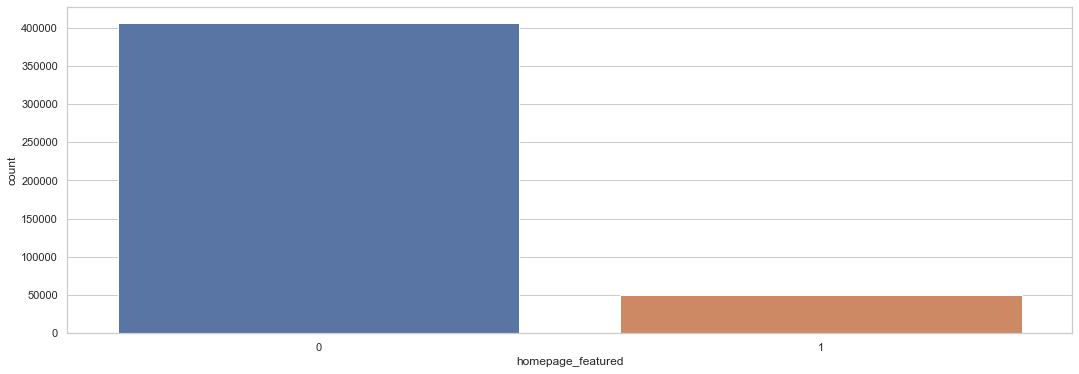

In [30]:
sns.countplot(df['homepage_featured'])

<IPython.core.display.Javascript object>

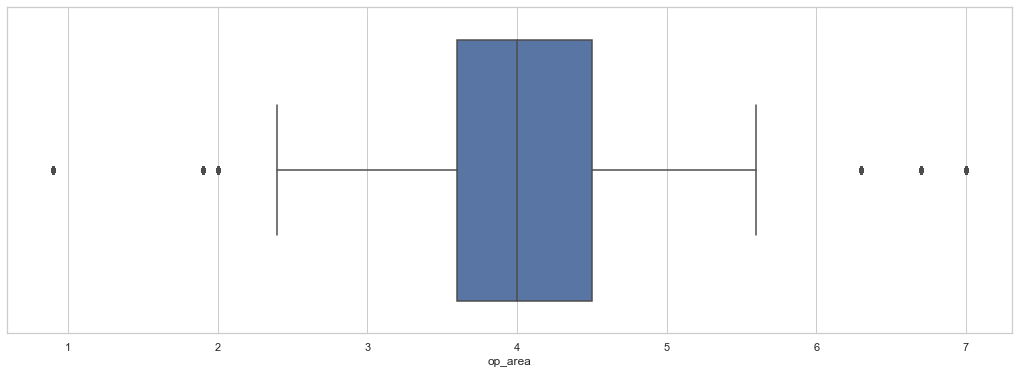

In [31]:
sns.boxplot(df['op_area'])

<IPython.core.display.Javascript object>

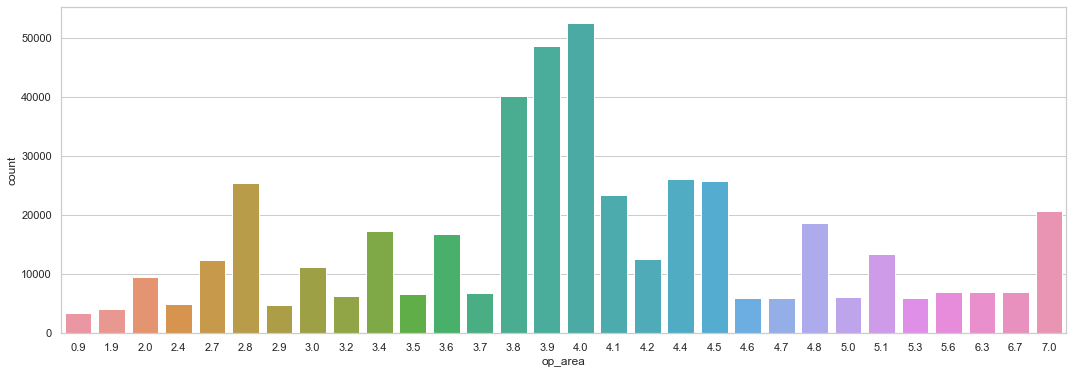

In [32]:
sns.countplot(df['op_area'])

<IPython.core.display.Javascript object>

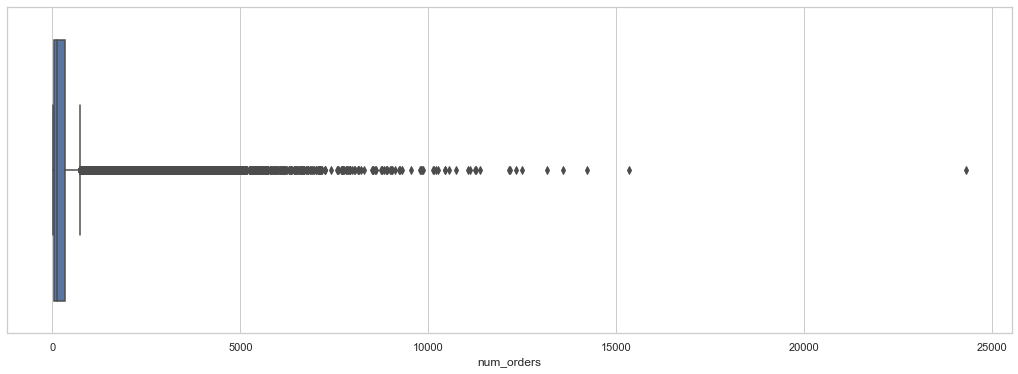

In [33]:
sns.boxplot(df['num_orders'])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

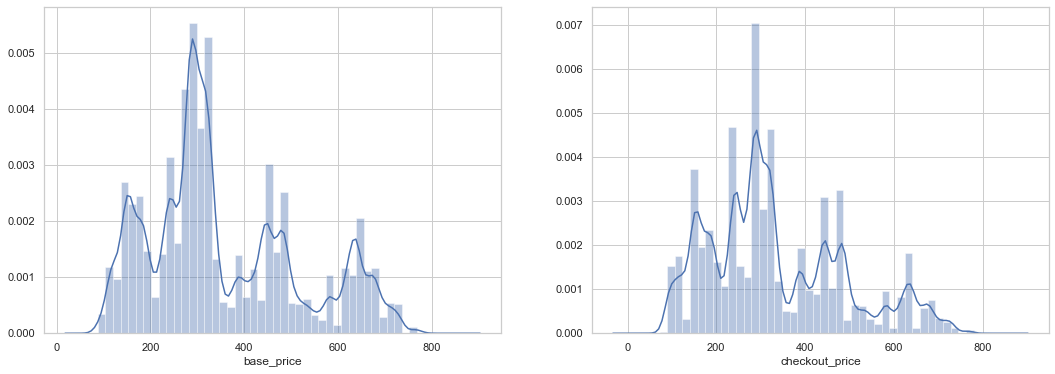

In [34]:
plt.subplot(121)
a = sns.distplot(df['base_price'])
plt.subplot(122)
a = sns.distplot(df['checkout_price'])

In [35]:
diff = df['base_price'] - df['checkout_price']

<IPython.core.display.Javascript object>

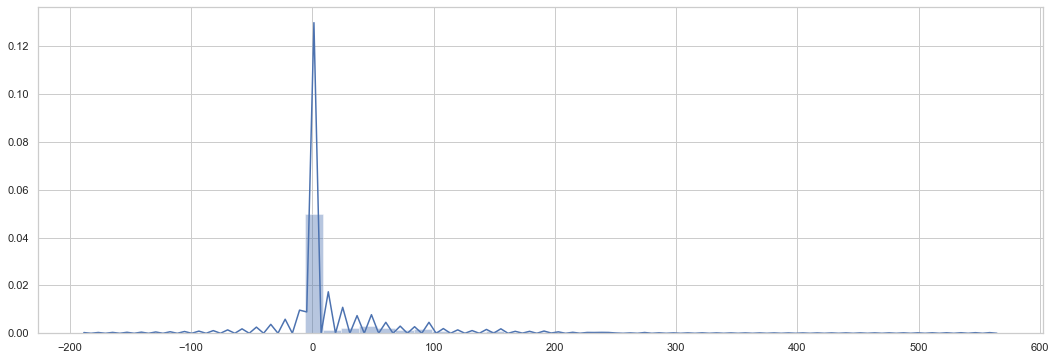

In [36]:
sns.distplot(diff)

so there is every less diffrence between checkout price and base price

In [37]:
len(df['num_orders'].unique())

1250

In [38]:
df.keys()

Index(['id', 'week', 'center_id', 'meal_id', 'checkout_price', 'base_price',
       'emailer_for_promotion', 'homepage_featured', 'num_orders', 'city_code',
       'region_code', 'center_type', 'op_area', 'category', 'cuisine'],
      dtype='object')

# Correlation Matrix

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

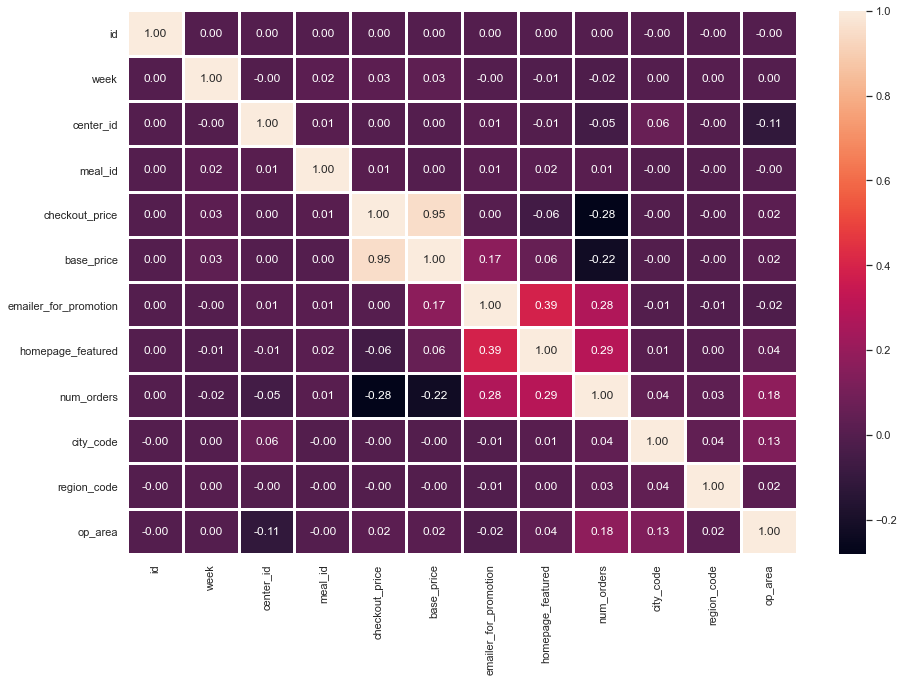

In [39]:
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(df.corr(), annot = True, fmt ='.2f', linewidth = 2)

### Bivariate Analysis

In [40]:
sns.set(rc={'figure.figsize':(10, 6)})

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

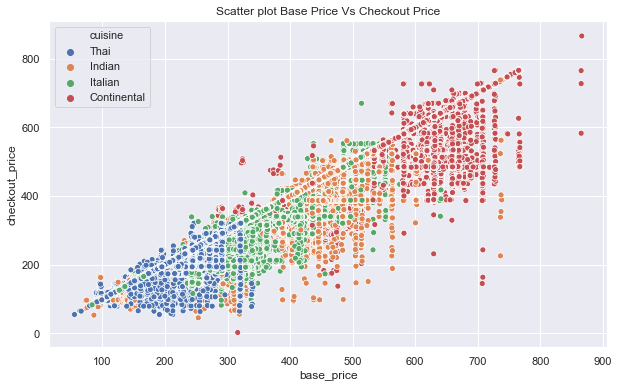

In [41]:
sns.scatterplot(data=df ,x='base_price',y='checkout_price',hue='cuisine')
plt.title('Scatter plot Base Price Vs Checkout Price')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

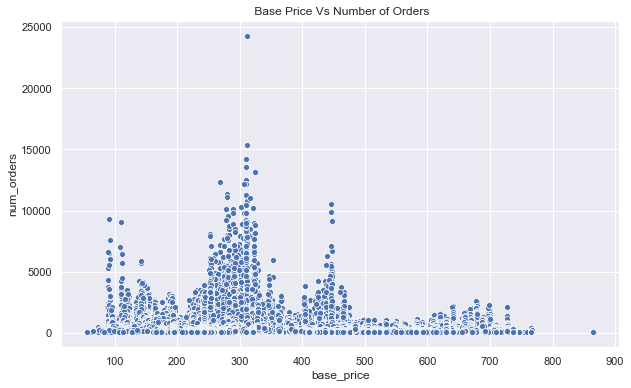

In [42]:
sns.scatterplot(data= df, x='base_price',y='num_orders')
plt.title(' Base Price Vs Number of Orders')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

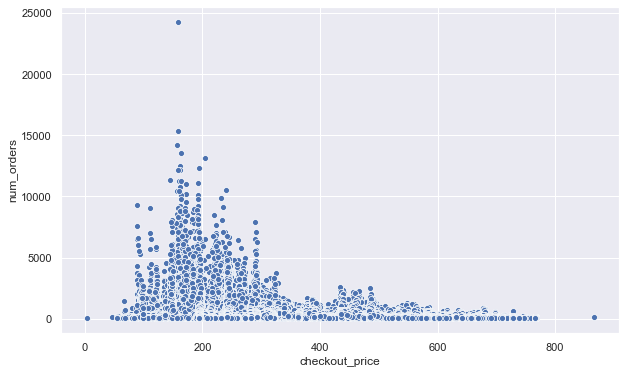

In [43]:
sns.scatterplot(data= df, x='checkout_price',y='num_orders')
plt.show()

**now our bivariate analysis is completed**

### let us create a copy 

In [44]:
df_new = df.copy()

In [45]:
df_test1 = df_test.copy()

### Label Encoding

let us convert some feature to continous

In [46]:
label = LabelEncoder()
df_new['center_type'] = label.fit_transform(df_new['center_type']) 
df_new['category'] = label.fit_transform(df_new['category']) 
df_new['cuisine'] = label.fit_transform(df_new['cuisine']) 

In [47]:
label = LabelEncoder()
df_test1['center_type'] = label.fit_transform(df_test1['center_type']) 
df_test1['category'] = label.fit_transform(df_test1['category']) 
df_test1['cuisine'] = label.fit_transform(df_test1['cuisine']) 

In [48]:
df_new.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,2,2.0,0,3
1,1018704,2,55,1885,135.83,152.29,0,0,323,647,56,2,2.0,0,3
2,1196273,3,55,1885,132.92,133.92,0,0,96,647,56,2,2.0,0,3
3,1116527,4,55,1885,135.86,134.86,0,0,163,647,56,2,2.0,0,3
4,1343872,5,55,1885,146.50,147.50,0,0,215,647,56,2,2.0,0,3


In [49]:
df_test.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,city_code,region_code,center_type,op_area,category,cuisine
0,1028232,146,55,1885,158.11,159.11,0,0,647,56,TYPE_C,2.0,Beverages,Thai
1,1262649,147,55,1885,159.11,159.11,0,0,647,56,TYPE_C,2.0,Beverages,Thai
2,1453211,149,55,1885,157.14,158.14,0,0,647,56,TYPE_C,2.0,Beverages,Thai
3,1262599,150,55,1885,159.14,157.14,0,0,647,56,TYPE_C,2.0,Beverages,Thai
4,1495848,151,55,1885,160.11,159.11,0,0,647,56,TYPE_C,2.0,Beverages,Thai


In [50]:
df.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai
1,1018704,2,55,1885,135.83,152.29,0,0,323,647,56,TYPE_C,2.0,Beverages,Thai
2,1196273,3,55,1885,132.92,133.92,0,0,96,647,56,TYPE_C,2.0,Beverages,Thai
3,1116527,4,55,1885,135.86,134.86,0,0,163,647,56,TYPE_C,2.0,Beverages,Thai
4,1343872,5,55,1885,146.50,147.50,0,0,215,647,56,TYPE_C,2.0,Beverages,Thai


In [51]:
df_test1.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,city_code,region_code,center_type,op_area,category,cuisine
0,1028232,146,55,1885,158.11,159.11,0,0,647,56,2,2.0,0,3
1,1262649,147,55,1885,159.11,159.11,0,0,647,56,2,2.0,0,3
2,1453211,149,55,1885,157.14,158.14,0,0,647,56,2,2.0,0,3
3,1262599,150,55,1885,159.14,157.14,0,0,647,56,2,2.0,0,3
4,1495848,151,55,1885,160.11,159.11,0,0,647,56,2,2.0,0,3


**Now our data is ready**

## Spliting the data

In [52]:
x = df_new.drop(['num_orders'], axis=1)
y = df['num_orders']

In [53]:
print('shape of x is --->', x.shape)
print('shape of y is --->', y.shape)

shape of x is ---> (456548, 14)
shape of y is ---> (456548,)


In [54]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [55]:
print('length of x train', x_train.shape )
print('length of y train', y_train.shape )

print('length of x test', x_test.shape )
print('length of y test', y_test.shape )

length of x train (365238, 14)
length of y train (365238,)
length of x test (91310, 14)
length of y test (91310,)


### Now the data is split in training and test no let's move on machine learning

### Linear Regression

In [56]:
lr = LinearRegression()
lr.fit(x_train, y_train)
lr_pred = lr.predict(x_test)

In [57]:
print(lr.coef_)
print(lr.intercept_)

[ 5.65080466e-07 -7.45886143e-02 -3.38072237e-01  6.57078626e-04
 -4.63225195e-01 -6.91706540e-01  2.96204376e+02  2.67179351e+02
  1.14845093e-01  6.00763917e-01 -3.67060858e+00  6.23176120e+01
  1.38674761e+01 -6.74602190e+01]
315.7597431200615


### Decision tree

In [58]:
tree = DecisionTreeRegressor()
tree.fit(x_train, y_train)
tree_pred = tree.predict(x_test)

### Random Forest Regressor

In [78]:
random = RandomForestRegressor(n_estimators =20, random_state =101)
random.fit(x_train, y_train)
random_pred = random.predict(x_test)

## Evaluation

#### Linear Regression Matrix

In [60]:
print('MAE:', metrics.mean_absolute_error(y_test, lr_pred))
print('MSE:', metrics.mean_squared_error(y_test, lr_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lr_pred)))

MAE: 195.8185428012761
MSE: 119990.42757271264


<IPython.core.display.Javascript object>

RMSE: 346.3963446295481


<IPython.core.display.Javascript object>

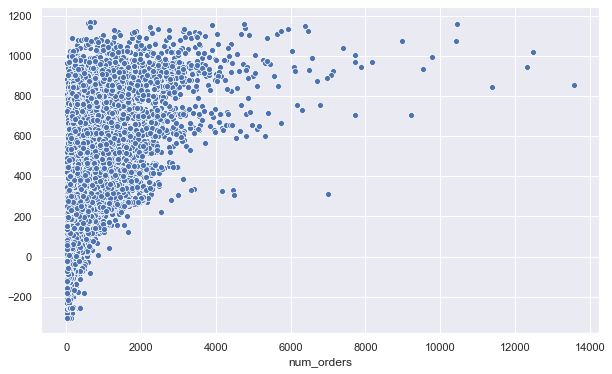

In [61]:
sns.scatterplot(y_test, lr_pred)

#### Decision tree Matrix

In [62]:
print('MAE:', metrics.mean_absolute_error(y_test, tree_pred))
print('MSE:', metrics.mean_squared_error(y_test, tree_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, tree_pred)))

MAE: 95.56303800240937
MSE: 52779.42031540904


<IPython.core.display.Javascript object>

RMSE: 229.73772070648096


<IPython.core.display.Javascript object>

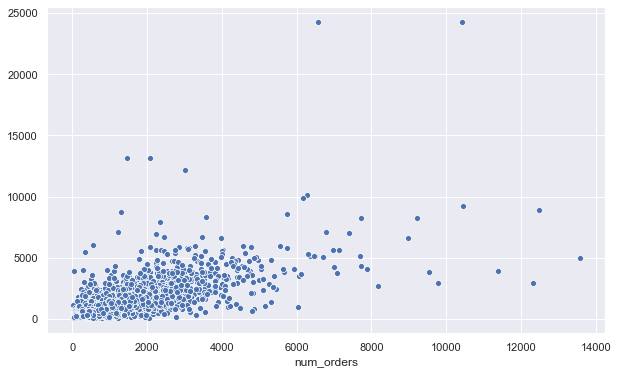

In [63]:
sns.scatterplot(y_test, tree_pred)

#### Random Forest Regressor Matrix

In [79]:
print('MAE:', metrics.mean_absolute_error(y_test, random_pred))
print('MSE:', metrics.mean_squared_error(y_test, random_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, random_pred)))

MAE: 71.81131529952908
MSE: 24985.284764538384


<IPython.core.display.Javascript object>

RMSE: 158.0673424985009


<IPython.core.display.Javascript object>

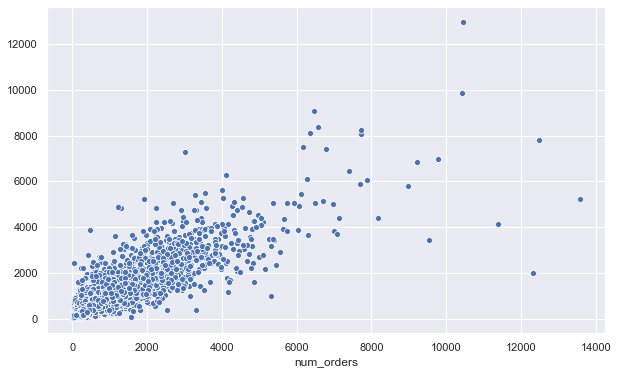

In [65]:
sns.scatterplot(y_test, random_pred)

In [66]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lr_pred)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, tree_pred)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, random_pred)))

<IPython.core.display.Javascript object>

RMSE: 346.3963446295481


<IPython.core.display.Javascript object>

RMSE: 229.73772070648096


<IPython.core.display.Javascript object>

RMSE: 161.65744068185163


### so we can see that rmse of random forest regression so lets us predict our test data set df_test1

In [67]:
df_test1.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,city_code,region_code,center_type,op_area,category,cuisine
0,1028232,146,55,1885,158.11,159.11,0,0,647,56,2,2.0,0,3
1,1262649,147,55,1885,159.11,159.11,0,0,647,56,2,2.0,0,3
2,1453211,149,55,1885,157.14,158.14,0,0,647,56,2,2.0,0,3
3,1262599,150,55,1885,159.14,157.14,0,0,647,56,2,2.0,0,3
4,1495848,151,55,1885,160.11,159.11,0,0,647,56,2,2.0,0,3


In [68]:
random_final_pred = random.predict(df_test1)

In [70]:
random_final_pred

array([166.4, 142.9,  96.9, ...,  36.7,  33.8,  38.9])

**So let's create dataset of final prediction of test data set and convert it into csv**

In [75]:
final_data_pred = pd.DataFrame({'id': df_test1['id'], 'num_orders': random_final_pred})

<IPython.core.display.Javascript object>

In [76]:
final_data_pred

,id,num_orders
0,1028232,166.4
1,1262649,142.9
2,1453211,96.9
3,1262599,142.9
4,1495848,169.9
...,...,...
32568,1412025,35.1
32569,1287019,64.2
32570,1396176,36.7
32571,1331977,33.8


## Creating csv

In [77]:
# final_data_pred.to_csv('final_dataset.csv', index=False)

## work is completed